In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
from wordcloud import WordCloud

## Problems
***In times like today, the development of social media is very rapidly and had an impact on an existing business. When word of mouth is carried out by netizens on a business product, it will have a good impact and a bad impact. If the good impact is received, it will make profits for the business company, but if the bad impact is carried out by certain individuals such as for example hate speech on the product, badmouthing the product, insulting the product it will harmful the business company,  Therefore it is necessary to have a machine that can assist in filtering negative sentiments that entering our business products.***

## Goals
***Can provide a solution to the problem above by making a machine that can predict a sentence that has a negative or positive connotation, to prevent negative sentences that have an impact on our product business.***

## Data Source
    Thanks to all the sources who have given permission to use the data by publishing it on the website.
    
    The Source all as follows:
    1. https://repo.telematika.org/project/louisowen6_nlp_bahasa_resources/
    2. https://www.kaggle.com/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text?select=data.csv
    3. https://rizalespe.github.io/Dataset-Sentimen-Analisis-Bahasa-Indonesia/
 

In [2]:
df = pd.read_csv('sentiment_analysis_clean.csv')
df = df.drop(columns='Unnamed: 0')
df

,Text,sentiment,text_lower,text_token,text_without_number,text_no_punctuation,text_exception,text_no_stopwords,convert_slangwords,convert_emojimeaning,unpacking_sentence,stemmed,text_token_stemmed,text_no_stopwords_stemmed,final
0,inkonsisten,-1,inkonsisten,['inkonsisten'],['inkonsisten'],['inkonsisten'],['inkonsisten'],['inkonsisten'],['inkonsisten'],['inkonsisten'],inkonsisten,inkonsisten,['inkonsisten'],['inkonsisten'],inkonsisten
1,porno,-1,porno,['porno'],['porno'],['porno'],['porno'],['porno'],['porno'],['porno'],porno,porno,['porno'],['porno'],porno
2,teroris,-1,teroris,['teroris'],['teroris'],['teroris'],['teroris'],['teroris'],['teroris'],['teroris'],teroris,teroris,['teroris'],['teroris'],teroris
3,sesat,-1,sesat,['sesat'],['sesat'],['sesat'],['sesat'],['sesat'],['sesat'],['sesat'],sesat,sesat,['sesat'],['sesat'],sesat
4,tuntut,-1,tuntut,['tuntut'],['tuntut'],['tuntut'],['tuntut'],['tuntut'],['tuntut'],['tuntut'],tuntut,tuntut,['tuntut'],['tuntut'],tuntut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20293,"Kali saja bpk @aniesbaswedan @sandiuno lihat, ...",1,"kali saja bpk @aniesbaswedan @sandiuno lihat, ...","['kali', 'saja', 'bpk', '@', 'aniesbaswedan', ...","['kali', 'saja', 'bpk', '@', 'aniesbaswedan', ...","['kali', 'saja', 'bpk', 'aniesbaswedan', 'sand...","['kali', 'saja', 'bpk', 'aniesbaswedan', 'sand...","['kali', 'bapak', 'aniesbaswedan', 'sandiuno',...","['kali', 'bapak', 'aniesbaswedan', 'sandiuno',...","['kali', 'bapak', 'aniesbaswedan', 'sandiuno',...",kali bapak aniesbaswedan sandiuno lihat rspun ...,kali bapak aniesbaswedan sandiuno lihat rspun ...,"['kali', 'bapak', 'aniesbaswedan', 'sandiuno',...","['kali', 'aniesbaswedan', 'sandiuno', 'lihat',...",kali aniesbaswedan sandiuno lihat rspun swafot...
20294,Kita harus dapat merangkul semua orang tanpa b...,1,kita harus dapat merangkul semua orang tanpa b...,"['kita', 'harus', 'dapat', 'merangkul', 'semua...","['kita', 'harus', 'dapat', 'merangkul', 'semua...","['kita', 'harus', 'dapat', 'merangkul', 'semua...","['kita', 'harus', 'dapat', 'merangkul', 'semua...","['merangkul', 'orang', 'batas', 'usia', 'kelam...","['merangkul', 'orang', 'batas', 'usia', 'kelam...","['merangkul', 'orang', 'batas', 'usia', 'kelam...",merangkul orang batas usia kelamin oke oce oke...,rangkul orang batas usia kelamin oke oce oke h...,"['rangkul', 'orang', 'batas', 'usia', 'kelamin...","['rangkul', 'orang', 'batas', 'usia', 'kelamin...",rangkul orang batas usia kelamin oke oce oke h...
20295,Ini jagoanku dibidang digital <Smiling Face Wi...,1,ini jagoanku dibidang digital <smiling face wi...,"['ini', 'jagoanku', 'dibidang', 'digital', '<'...","['ini', 'jagoanku', 'dibidang', 'digital', '<'...","['ini', 'jagoanku', 'dibidang', 'digital', 'sm...","['ini', 'jagoanku', 'dibidang', 'digital', 'sm...","['jagoanku', 'dibidang', 'digital', 'smiling',...","['jagoanku', 'dibidang', 'digital', 'smiling',...","['jagoanku', 'dibidang', 'digital', 'smiling',...",jagoanku dibidang digital smiling face dengan ...,jago bidang digital smiling face dengan sungla...,"['jago', 'bidang', 'digital', 'smiling', 'face...","['jago', 'bidang', 'digital', 'smiling', 'face...",jago bidang digital smiling face sunglasses ok...
20296,#PesanBijak #OkeOce #GubernurGu3 ...,1,#pesanbijak #okeoce #gubernurgu3 ...,"['#', 'pesanbijak', '#', 'okeoce', '#', 'guber...","['#', 'pesanbijak', '#', 'okeoce', '#', 'guber...","['pesanbijak', 'okeoce', 'gubernurgu3', '...']","['pesanbijak', 'okeoce', 'gubernurgu3']","['pesanbijak', 'oke oce', 'gubernurgu3']","['pesanbijak', 'oke', 'oce', 'gubernurgu3']","['pesanbijak', 'oke', 'oce', 'gubernurgu3']",pesanbijak oke oce gubernurgu3,pesanbijak oke oce gubernurgu3,"['pesanbijak', 'oke', 'oce', 'gubernurgu3']","['pesanbijak', 'oke', 'oce', 'gubernurgu3']",pesanbijak oke oce gubernurgu3


## Data Source
    Thanks to all the sources who have given permission to use the data by publishing it on the website.
    
    The Source all as follows:
    1. https://repo.telematika.org/project/louisowen6_nlp_bahasa_resources/
    2. https://www.kaggle.com/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text?select=data.csv
    3. https://rizalespe.github.io/Dataset-Sentimen-Analisis-Bahasa-Indonesia/
 

## Handling Missing Value

In [3]:
df.isna().sum()

Text                           0
sentiment                      0
text_lower                     0
text_token                     0
text_without_number            0
text_no_punctuation            0
text_exception                 0
text_no_stopwords              0
convert_slangwords             0
convert_emojimeaning           0
unpacking_sentence           490
stemmed                      491
text_token_stemmed             0
text_no_stopwords_stemmed      0
final                        588
dtype: int64

In [4]:
df['stemmed'].isna().sum()

491

In [5]:
df[df['stemmed'].isna()]

,Text,sentiment,text_lower,text_token,text_without_number,text_no_punctuation,text_exception,text_no_stopwords,convert_slangwords,convert_emojimeaning,unpacking_sentence,stemmed,text_token_stemmed,text_no_stopwords_stemmed,final
16,hanya,-1,hanya,['hanya'],['hanya'],['hanya'],['hanya'],[],[],[],NaN,NaN,[],[],NaN
17,cuma,-1,cuma,['cuma'],['cuma'],['cuma'],['cuma'],[],[],[],NaN,NaN,[],[],NaN
19,kurang,-1,kurang,['kurang'],['kurang'],['kurang'],['kurang'],[],[],[],NaN,NaN,[],[],NaN
25,bukan,-1,bukan,['bukan'],['bukan'],['bukan'],['bukan'],[],[],[],NaN,NaN,[],[],NaN
26,tidak,-1,tidak,['tidak'],['tidak'],['tidak'],['tidak'],[],[],[],NaN,NaN,[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,Light_Bulb,1,light_bulb,['light_bulb'],['light_bulb'],['light_bulb'],[],[],[],[],NaN,NaN,[],[],NaN
18401,Chart_Increasing,1,chart_increasing,['chart_increasing'],['chart_increasing'],['chart_increasing'],[],[],[],[],NaN,NaN,[],[],NaN
18402,Hundred_Points,1,hundred_points,['hundred_points'],['hundred_points'],['hundred_points'],[],[],[],[],NaN,NaN,[],[],NaN
18403,OK_Button,1,ok_button,['ok_button'],['ok_button'],['ok_button'],[],[],[],[],NaN,NaN,[],[],NaN


In [6]:
print("Before drop Missing Value :", len(df))
df.dropna(inplace=True)
print("After drop Missing Value :", len(df))

Before drop Missing Value : 20298
After drop Missing Value : 19710


## Handling Duplicates Data

In [7]:
print("Before drop Duplicates Data :", len(df))
df.drop_duplicates(['stemmed'], inplace=True)
print("After drop Duplicates Data :", len(df))

Before drop Duplicates Data : 19710
After drop Duplicates Data : 17337


Finally we now have 15967 data after we drop missing value and duplicates data, now the data is ready.

# Exploratory Data Analysis

### Percentage Sentiment Negative and Positive from this dataset

In [8]:
pd.crosstab(index=df['sentiment'], columns='count', normalize=True)*100

col_0,count
sentiment,
-1,57.086001
1,42.913999


as we can see from this table **total negative sentiment 58.25%** and **total positive sentiment 41.75%**.

### Distribution of Sentence Length

In [9]:
df['length_words'] = df['final'].apply(lambda x: len(x.split()))

In [10]:
df.sample()

,Text,sentiment,text_lower,text_token,text_without_number,text_no_punctuation,text_exception,text_no_stopwords,convert_slangwords,convert_emojimeaning,unpacking_sentence,stemmed,text_token_stemmed,text_no_stopwords_stemmed,final,length_words
7931,Wkwkwjjwjw.. Asu URL,-1,wkwkwjjwjw.. asu url,"['wkwkwjjwjw', '..', 'asu', 'url']","['wkwkwjjwjw', '..', 'asu', 'url']","['wkwkwjjwjw', '..', 'asu', 'url']","['wkwkwjjwjw', 'asu']","['wkwk', 'anjing']","['wkwk', 'anjing']","['wkwk', 'anjing']",wkwk anjing,wkwk anjing,"['wkwk', 'anjing']","['wkwk', 'anjing']",wkwk anjing,2


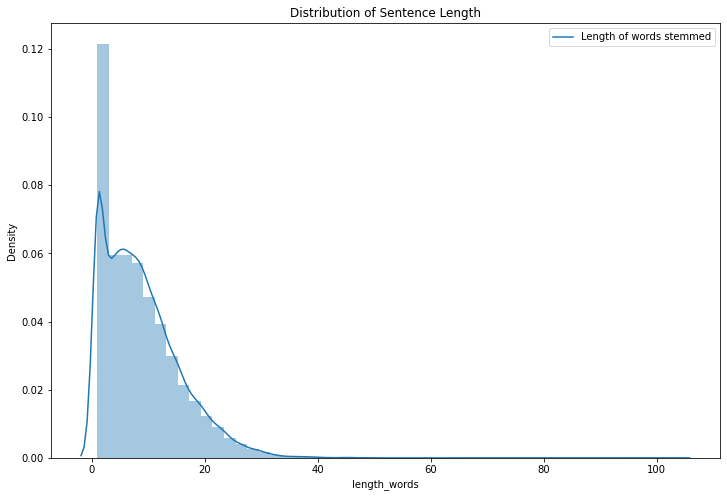

In [11]:
plt.figure(figsize=(12,8))
sns.distplot(df['length_words'])
plt.legend(labels=['Length of words stemmed'])
plt.title('Distribution of Sentence Length')
plt.show()

as we can see from this distplot the **length of words in range 1-120 words**, and **majority the words in range 1-15 words**.

## Analysis Negative Sentiment

In [12]:
df_negative = df[df['sentiment'] == -1]
df_negative.sample(5)

,Text,sentiment,text_lower,text_token,text_without_number,text_no_punctuation,text_exception,text_no_stopwords,convert_slangwords,convert_emojimeaning,unpacking_sentence,stemmed,text_token_stemmed,text_no_stopwords_stemmed,final,length_words
8683,RT USER: Yeyy hari ini dpat cogan d azar \xf0\...,-1,rt user: yeyy hari ini dpat cogan d azar \xf0\...,"['rt', 'user', ':', 'yeyy', 'hari', 'ini', 'dp...","['rt', 'user', ':', 'yeyy', 'hari', 'ini', 'dp...","['rt', 'user', 'yeyy', 'hari', 'ini', 'dpat', ...","['yeyy', 'hari', 'ini', 'dpat', 'cogan', 'd', ...","['hore', 'dapat', 'cowok ganteng', 'di', 'azar...","['hore', 'dapat', 'cowok', 'ganteng', 'di', 'a...","['hore', 'dapat', 'cowok', 'ganteng', 'di', 'a...",hore dapat cowok ganteng di azar berondong lok...,hore dapat cowok ganteng di azar berondong lok...,"['hore', 'dapat', 'cowok', 'ganteng', 'di', 'a...","['hore', 'cowok', 'ganteng', 'azar', 'berondon...",hore cowok ganteng azar berondong lokal kontol...,12
12643,"USER Jangan gaduh lahh,, kami yg kau panggil c...",-1,"user jangan gaduh lahh,, kami yg kau panggil c...","['user', 'jangan', 'gaduh', 'lahh', ',', ',', ...","['user', 'jangan', 'gaduh', 'lahh', ',', ',', ...","['user', 'jangan', 'gaduh', 'lahh', 'kami', 'y...","['jangan', 'gaduh', 'lahh', 'kami', 'yg', 'kau...","['gaduh', 'lah', 'yang', 'kamu', 'panggil', 'c...","['gaduh', 'lah', 'yang', 'kamu', 'panggil', 'c...","['gaduh', 'lah', 'yang', 'kamu', 'panggil', 'c...",gaduh lah yang kamu panggil cebong sudah tidak...,gaduh lah yang kamu panggil cebong sudah tidak...,"['gaduh', 'lah', 'yang', 'kamu', 'panggil', 'c...","['gaduh', 'panggil', 'cebong', 'butuh', 'manus...",gaduh panggil cebong butuh manusia munafik,6
12139,"USER Yang ngejijikin, dia ga ngakuin itu anakn...",-1,"user yang ngejijikin, dia ga ngakuin itu anakn...","['user', 'yang', 'ngejijikin', ',', 'dia', 'ga...","['user', 'yang', 'ngejijikin', ',', 'dia', 'ga...","['user', 'yang', 'ngejijikin', 'dia', 'ga', 'n...","['yang', 'ngejijikin', 'dia', 'ga', 'ngakuin',...","['menjijikkan', 'tidak', 'mengakui', 'anaknya'...","['menjijikkan', 'tidak', 'mengakui', 'anaknya'...","['menjijikkan', 'tidak', 'mengakui', 'anaknya'...",menjijikkan tidak mengakui anaknya tidak menga...,jijik tidak aku anak tidak aku kalau dukung pr...,"['jijik', 'tidak', 'aku', 'anak', 'tidak', 'ak...","['jijik', 'anak', 'dukung', 'prabowo', 'pendet...",jijik anak dukung prabowo pendeta setan,6
12207,(((ikeafurniture stan))))\n\nngakak bgt tae',-1,(((ikeafurniture stan))))\n\nngakak bgt tae',"['(', '(', '(', 'ikeafurniture', 'stan', ')', ...","['(', '(', '(', 'ikeafurniture', 'stan', ')', ...","['ikeafurniture', 'stan', '\\n\\nngakak', 'bgt...","['ikeafurniture', 'stan', 'bgt', 'tae']","['ikea furniture', 'stan', 'banget', 'tai']","['ikea', 'furniture', 'stan', 'banget', 'tai']","['ikea', 'furniture', 'stan', 'banget', 'tai']",ikea furniture stan banget tai,ikea furniture stan banget tai,"['ikea', 'furniture', 'stan', 'banget', 'tai']","['ikea', 'furniture', 'stan', 'banget', 'tai']",ikea furniture stan banget tai,5
10779,USER USER USER USER USER USER USER Terbantahka...,-1,user user user user user user user terbantahka...,"['user', 'user', 'user', 'user', 'user', 'user...","['user', 'user', 'user', 'user', 'user', 'user...","['user', 'user', 'user', 'user', 'user', 'user...","['terbantahkan', 'mata', 'lo', 'dongo', 'bange...","['terbantahkan', 'mata', 'kamu', 'dongok', 'ba...","['terbantahkan', 'mata', 'kamu', 'dongok', 'ba...","['terbantahkan', 'mata', 'kamu', 'dongok', 'ba...",terbantahkan mata kamu dongok banget kamu tong...,bantah mata kamu dongok banget kamu tong bicar...,"['bantah', 'mata', 'kamu', 'dongok', 'banget',...","['bantah', 'mata', 'dongok', 'banget', 'tong',...",bantah mata dongok banget tong bicara gasal mu...,9


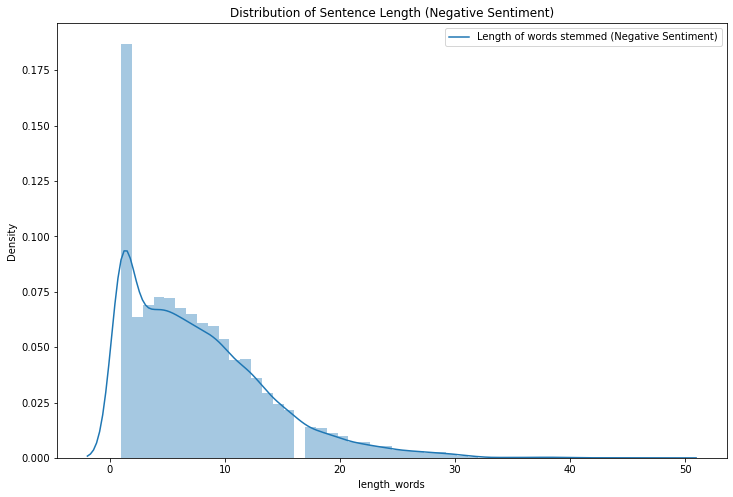

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(df_negative['length_words'])
plt.legend(labels=['Length of words stemmed (Negative Sentiment)'])
plt.title('Distribution of Sentence Length (Negative Sentiment)')
plt.show()

it looks like the same with all data for negative sentiment distribution of sentence length. the **length of words in range 1-70 words**, and **majority the words in range 1-10 words**.

In [14]:
check_negative = df_negative['final'].str.extractall('([a-zA_Z]+)')
check_negative.columns = ['word']
newcheck_negative = check_negative.reset_index(drop=True)
negative_words = pd.crosstab(index=newcheck_negative['word'], columns='count').sort_values(by='count', ascending=False)
negative_words

col_0,count
word,
indonesia,935
gue,817
ya,790
presiden,770
orang,769
...,...
kedaluarsa,1
kecikampek,1
kecepatanya,1


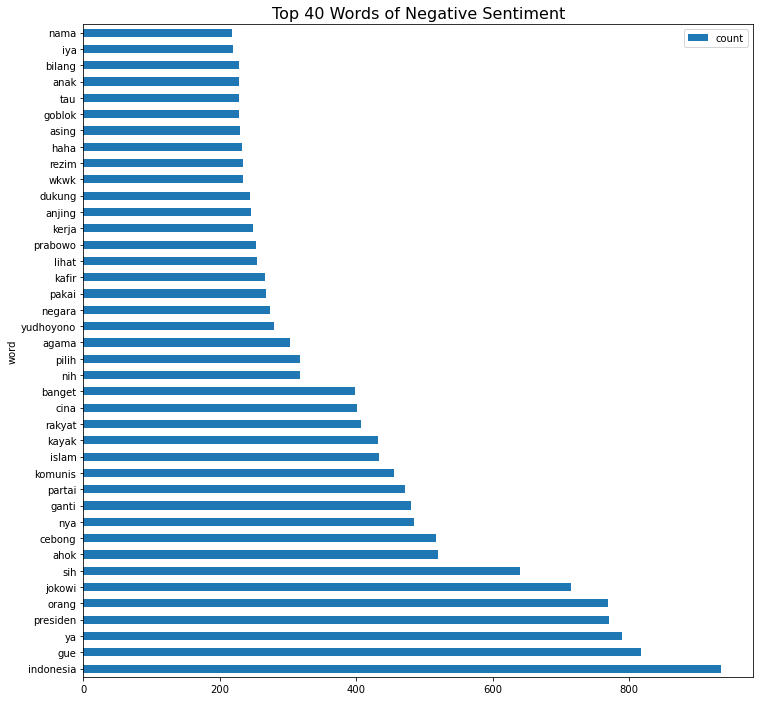

In [15]:
negative_words.head(40).plot(kind='barh', figsize=(12,12))
plt.title('Top 40 Words of Negative Sentiment', size=16)
plt.legend(['count'])
plt.show()

there are top words for negative sentiment such as 'indonesia', 'gue', 'ya', 'presiden', 'orang', etc

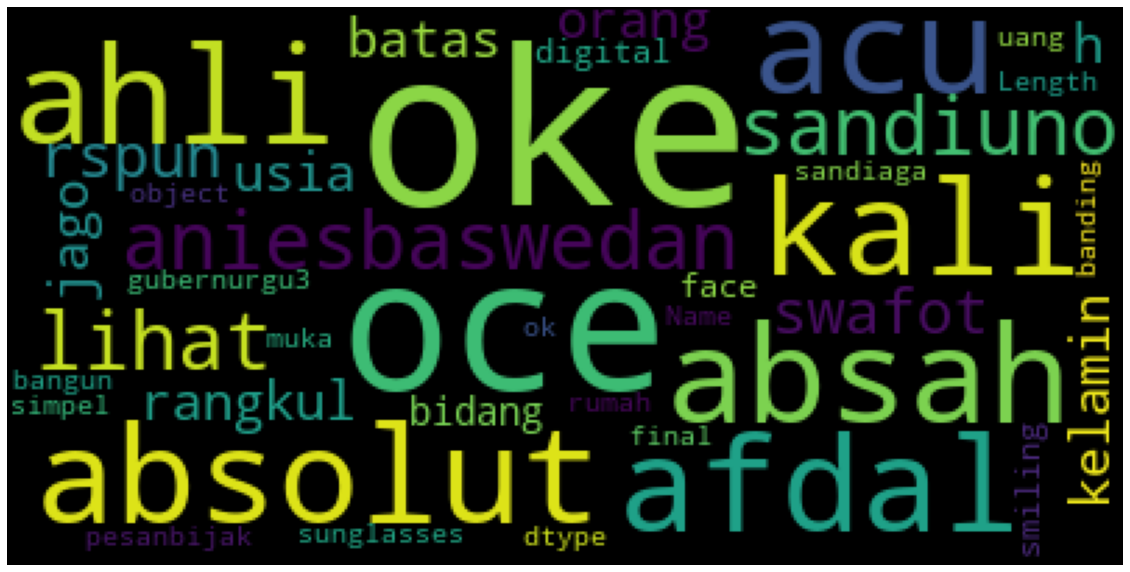

In [35]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(str(df[df['sentiment'] == 1]['final'])))
plt.axis('off')
plt.show()

## Analysis Positive Sentiment

In [16]:
df_positive = df[df['sentiment'] == 1]
df_positive.sample(5)

,Text,sentiment,text_lower,text_token,text_without_number,text_no_punctuation,text_exception,text_no_stopwords,convert_slangwords,convert_emojimeaning,unpacking_sentence,stemmed,text_token_stemmed,text_no_stopwords_stemmed,final,length_words
20211,Era #AniesSandi pastinya tidak ada lagi ucapan...,1,era #aniessandi pastinya tidak ada lagi ucapan...,"['era', '#', 'aniessandi', 'pastinya', 'tidak'...","['era', '#', 'aniessandi', 'pastinya', 'tidak'...","['era', 'aniessandi', 'pastinya', 'tidak', 'ad...","['era', 'aniessandi', 'pastinya', 'tidak', 'ad...","['era', 'aniessandi', 'pastinya', 'ucapan', 'p...","['era', 'aniessandi', 'pastinya', 'ucapan', 'p...","['era', 'aniessandi', 'pastinya', 'ucapan', 'p...",era aniessandi pastinya ucapan pemahaman nenek...,era aniessandi pasti ucap paham nenek kamu uca...,"['era', 'aniessandi', 'pasti', 'ucap', 'paham'...","['era', 'aniessandi', 'paham', 'nenek', 'peril...",era aniessandi paham nenek perilaku santun,6
12939,USER bangkrut si USER jualan islam liberal pad...,1,user bangkrut si user jualan islam liberal pad...,"['user', 'bangkrut', 'si', 'user', 'jualan', '...","['user', 'bangkrut', 'si', 'user', 'jualan', '...","['user', 'bangkrut', 'si', 'user', 'jualan', '...","['bangkrut', 'si', 'jualan', 'islam', 'liberal...","['bangkrut', 'sih', 'jualan', 'islam', 'libera...","['bangkrut', 'sih', 'jualan', 'islam', 'libera...","['bangkrut', 'sih', 'jualan', 'islam', 'libera...",bangkrut sih jualan islam liberal dana dari sy...,bangkrut sih jual islam liberal dana dari syia...,"['bangkrut', 'sih', 'jual', 'islam', 'liberal'...","['bangkrut', 'sih', 'jual', 'islam', 'liberal'...",bangkrut sih jual islam liberal dana syiah ban...,14
12757,Budaya Sunda Bikin Mahasiswa Asing Jatuh Cinta...,1,budaya sunda bikin mahasiswa asing jatuh cinta...,"['budaya', 'sunda', 'bikin', 'mahasiswa', 'asi...","['budaya', 'sunda', 'bikin', 'mahasiswa', 'asi...","['budaya', 'sunda', 'bikin', 'mahasiswa', 'asi...","['budaya', 'sunda', 'bikin', 'mahasiswa', 'asi...","['budaya', 'sunda', 'bikin', 'mahasiswa', 'asi...","['budaya', 'sunda', 'bikin', 'mahasiswa', 'asi...","['budaya', 'sunda', 'bikin', 'mahasiswa', 'asi...",budaya sunda bikin mahasiswa asing jatuh cinta...,budaya sunda bikin mahasiswa asing jatuh cinta...,"['budaya', 'sunda', 'bikin', 'mahasiswa', 'asi...","['budaya', 'sunda', 'bikin', 'mahasiswa', 'asi...",budaya sunda bikin mahasiswa asing jatuh cinta...,12
14026,"8. Terakhir, adakah tips untuk para #updaters ...",1,"8. terakhir, adakah tips untuk para #updaters ...","['8.', 'terakhir', ',', 'adakah', 'tips', 'unt...","['8.', 'terakhir', ',', 'adakah', 'tips', 'unt...","['8.', 'terakhir', 'adakah', 'tips', 'untuk', ...","['terakhir', 'adakah', 'tips', 'untuk', 'para'...","['adakah', 'tips', 'pembaru', 'freelance', 'wr...","['adakah', 'tips', 'pembaru', 'freelance', 'wr...","['adakah', 'tips', 'pembaru', 'freelance', 'wr...",adakah tips pembaru freelance writer aku chat,ada tips baru freelance writer aku chat,"['ada', 'tips', 'baru', 'freelance', 'writer',...","['tips', 'freelance', 'writer', 'chat']",tips freelance writer chat,4
10543,"Jelang pilkada, ini yang jadi perhatian Gubern...",1,"jelang pilkada, ini yang jadi perhatian gubern...","['jelang', 'pilkada', ',', 'ini', 'yang', 'jad...","['jelang', 'pilkada', ',', 'ini', 'yang', 'jad...","['jelang', 'pilkada', 'ini', 'yang', 'jadi', '...","['jelang', 'pilkada', 'ini', 'yang', 'jadi', '...","['jelang', 'pilihan kepala daerah', 'perhatian...","['jelang', 'pilihan', 'kepala', 'daerah', 'per...","['jelang', 'pilihan', 'kepala', 'daerah', 'per...",jelang pilihan kepala daerah perhatian gubernu...,jelang pilih kepala daerah perhati gubernur ka...,"['jelang', 'pilih', 'kepala', 'daerah', 'perha...","['jelang', 'pilih', 'kepala', 'daerah', 'perha...",jelang pilih kepala daerah perhati gubernur ka...,7


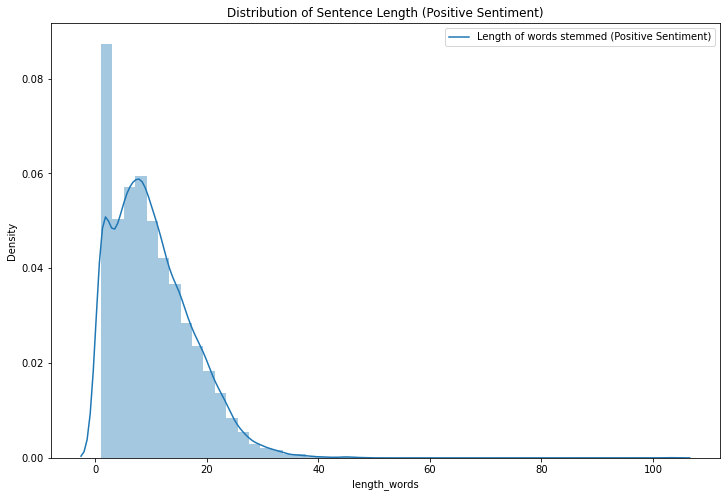

In [17]:
plt.figure(figsize=(12,8))
sns.distplot(df_positive['length_words'])
plt.legend(labels=['Length of words stemmed (Positive Sentiment)'])
plt.title('Distribution of Sentence Length (Positive Sentiment)')
plt.show()

it looks like the same with all data for negative sentiment distribution of sentence length. the **length of words in range 1-120 words**, and **majority the words in range 1-15 words**.

In [18]:
check_positive = df_positive['final'].str.extractall('([a-zA_Z]+)')
check_positive.columns = ['word']
newcheck_positive = check_positive.reset_index(drop=True)
positive_words = pd.crosstab(index=newcheck_positive['word'], columns='count').sort_values(by='count', ascending=False)
positive_words

col_0,count
word,
indonesia,847
presiden,744
orang,719
pilih,654
ya,589
...,...
kenapaaa,1
kenap,1
kemlaten,1


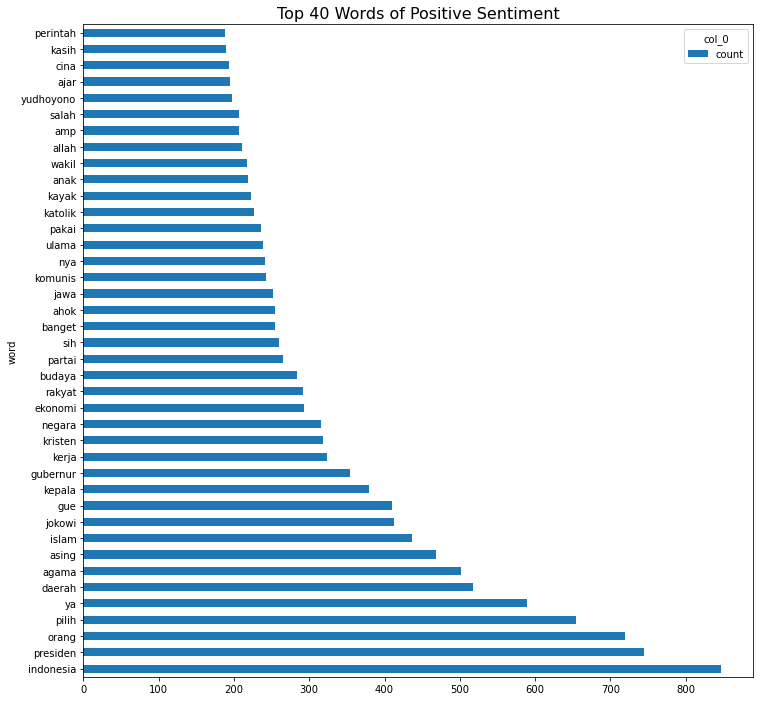

In [19]:
positive_words.head(40).plot(kind='barh', figsize=(12,12))
plt.title('Top 40 Words of Positive Sentiment', size=16)
plt.show()

there are top words for negative sentiment such as 'indonesia', 'presiden', 'orang', 'pilih', 'ya', etc

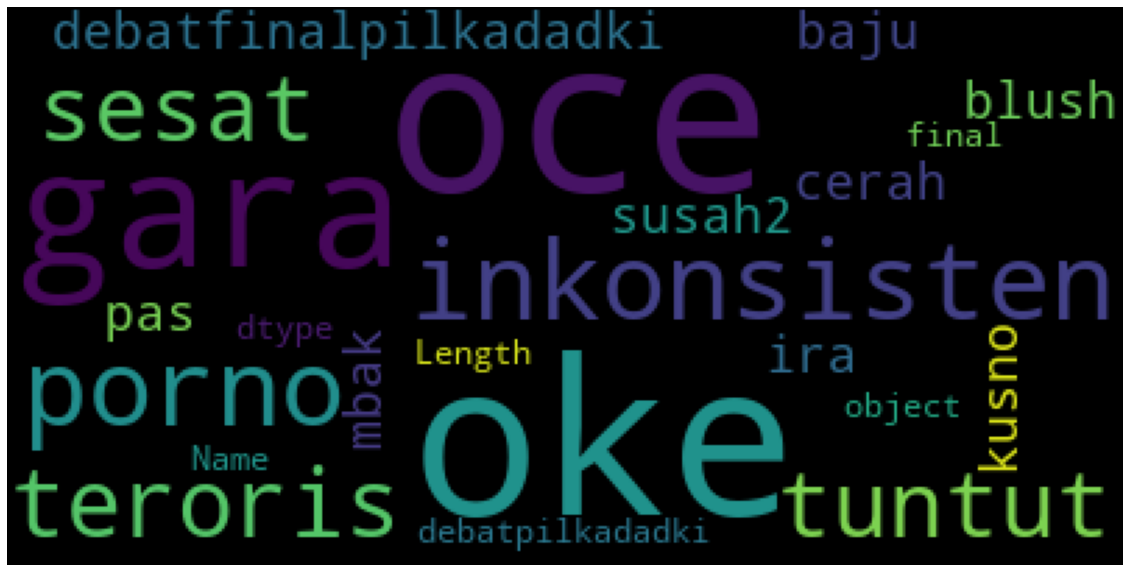

In [41]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(str(df[df['sentiment'] == -1]['final'])))
plt.axis('off')
plt.show()

### -----------------------------------------------------------------------------------------------------------------

## Conclusion

**Surprisingly top 40 words for negative and positive sentiment seems like the same depending on the connotation, example for negative sentiment contains ethnicity, racism, religion, and inter-group relations. However, positive sentiment contains like a good connotation of the president's performance.**

In [43]:
df = df.reset_index(drop=True)
df

,Text,sentiment,text_lower,text_token,text_without_number,text_no_punctuation,text_exception,text_no_stopwords,convert_slangwords,convert_emojimeaning,unpacking_sentence,stemmed,text_token_stemmed,text_no_stopwords_stemmed,final,length_words
0,inkonsisten,-1,inkonsisten,['inkonsisten'],['inkonsisten'],['inkonsisten'],['inkonsisten'],['inkonsisten'],['inkonsisten'],['inkonsisten'],inkonsisten,inkonsisten,['inkonsisten'],['inkonsisten'],inkonsisten,1
1,porno,-1,porno,['porno'],['porno'],['porno'],['porno'],['porno'],['porno'],['porno'],porno,porno,['porno'],['porno'],porno,1
2,teroris,-1,teroris,['teroris'],['teroris'],['teroris'],['teroris'],['teroris'],['teroris'],['teroris'],teroris,teroris,['teroris'],['teroris'],teroris,1
3,sesat,-1,sesat,['sesat'],['sesat'],['sesat'],['sesat'],['sesat'],['sesat'],['sesat'],sesat,sesat,['sesat'],['sesat'],sesat,1
4,tuntut,-1,tuntut,['tuntut'],['tuntut'],['tuntut'],['tuntut'],['tuntut'],['tuntut'],['tuntut'],tuntut,tuntut,['tuntut'],['tuntut'],tuntut,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,"Kali saja bpk @aniesbaswedan @sandiuno lihat, ...",1,"kali saja bpk @aniesbaswedan @sandiuno lihat, ...","['kali', 'saja', 'bpk', '@', 'aniesbaswedan', ...","['kali', 'saja', 'bpk', '@', 'aniesbaswedan', ...","['kali', 'saja', 'bpk', 'aniesbaswedan', 'sand...","['kali', 'saja', 'bpk', 'aniesbaswedan', 'sand...","['kali', 'bapak', 'aniesbaswedan', 'sandiuno',...","['kali', 'bapak', 'aniesbaswedan', 'sandiuno',...","['kali', 'bapak', 'aniesbaswedan', 'sandiuno',...",kali bapak aniesbaswedan sandiuno lihat rspun ...,kali bapak aniesbaswedan sandiuno lihat rspun ...,"['kali', 'bapak', 'aniesbaswedan', 'sandiuno',...","['kali', 'aniesbaswedan', 'sandiuno', 'lihat',...",kali aniesbaswedan sandiuno lihat rspun swafot...,12
17333,Kita harus dapat merangkul semua orang tanpa b...,1,kita harus dapat merangkul semua orang tanpa b...,"['kita', 'harus', 'dapat', 'merangkul', 'semua...","['kita', 'harus', 'dapat', 'merangkul', 'semua...","['kita', 'harus', 'dapat', 'merangkul', 'semua...","['kita', 'harus', 'dapat', 'merangkul', 'semua...","['merangkul', 'orang', 'batas', 'usia', 'kelam...","['merangkul', 'orang', 'batas', 'usia', 'kelam...","['merangkul', 'orang', 'batas', 'usia', 'kelam...",merangkul orang batas usia kelamin oke oce oke...,rangkul orang batas usia kelamin oke oce oke h...,"['rangkul', 'orang', 'batas', 'usia', 'kelamin...","['rangkul', 'orang', 'batas', 'usia', 'kelamin...",rangkul orang batas usia kelamin oke oce oke h...,16
17334,Ini jagoanku dibidang digital <Smiling Face Wi...,1,ini jagoanku dibidang digital <smiling face wi...,"['ini', 'jagoanku', 'dibidang', 'digital', '<'...","['ini', 'jagoanku', 'dibidang', 'digital', '<'...","['ini', 'jagoanku', 'dibidang', 'digital', 'sm...","['ini', 'jagoanku', 'dibidang', 'digital', 'sm...","['jagoanku', 'dibidang', 'digital', 'smiling',...","['jagoanku', 'dibidang', 'digital', 'smiling',...","['jagoanku', 'dibidang', 'digital', 'smiling',...",jagoanku dibidang digital smiling face dengan ...,jago bidang digital smiling face dengan sungla...,"['jago', 'bidang', 'digital', 'smiling', 'face...","['jago', 'bidang', 'digital', 'smiling', 'face...",jago bidang digital smiling face sunglasses ok...,11
17335,#PesanBijak #OkeOce #GubernurGu3 ...,1,#pesanbijak #okeoce #gubernurgu3 ...,"['#', 'pesanbijak', '#', 'okeoce', '#', 'guber...","['#', 'pesanbijak', '#', 'okeoce', '#', 'guber...","['pesanbijak', 'okeoce', 'gubernurgu3', '...']","['pesanbijak', 'okeoce', 'gubernurgu3']","['pesanbijak', 'oke oce', 'gubernurgu3']","['pesanbijak', 'oke', 'oce', 'gubernurgu3']","['pesanbijak', 'oke', 'oce', 'gubernurgu3']",pesanbijak oke oce gubernurgu3,pesanbijak oke oce gubernurgu3,"['pesanbijak', 'oke', 'oce', 'gubernurgu3']","['pesanbijak', 'oke', 'oce', 'gubernurgu3']",pesanbijak oke oce gubernurgu3,4


In [44]:
# the data is ready to for machine learning prediction
df.to_csv('ml_sentiment_analysis.csv')